## Concrete Strength Analysis

### Description
##### An analysis on concretes for structural engineers to know the strength of materials in order to design safe structures. We also develop a model that predicts the compressive strength of concrete based on what it is made of and how old the concrete is. The model also provides an uncertainty in the strength prediction so that engineers can ensure that the design is safe.

In [36]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


import warnings

warnings.filterwarnings('ignore')





In [5]:
# read the data set
data = pd.read_csv('Concrete_Data_Yeh.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# Description of the dataset
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Description

First we can observe that there are no missing values for each of the field and we have a total of 1030 records. Slag and Flyash have large variation as we have minimum values as 22 and 0 as against maximun of 359.4 and 200.1 respectively indicating not all samples have values for these features and with over 75% of the data having 142.9 and 118.3 this will greatly influence the mean values.   The same applies for superplacticizer

Majority of the data in the sample falls within the 50 to 75 Quartiles 

the strength ranges from a very low value of 2.33 to 82.60 having the average of 35.8 which implies the data covers a wide range of strength of the materials



In [7]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### The datatype for all the features and label are numeric as expected

In [10]:
# Checking for duplicated
duplicated_data = data[data.duplicated()]
duplicated_data


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [11]:
print(len(duplicated_data) ,  " Duplicates Found")  

25  Duplicates Found


In [13]:
# Removing duplicates
clean_data = data.drop_duplicates()
print(len(duplicated_data) , " Duplicates Removed with " , len(clean_data), " Left")

25  Duplicates Removed with  1005  Left


### Data Cleaning
We discovered the data set had 25 records duplicated which we dropped. Duplicated records can greatly introduce bias and impact performance of our model 


### Data Correleation

In [14]:
data_corr = clean_data.corr()
data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<Axes: >

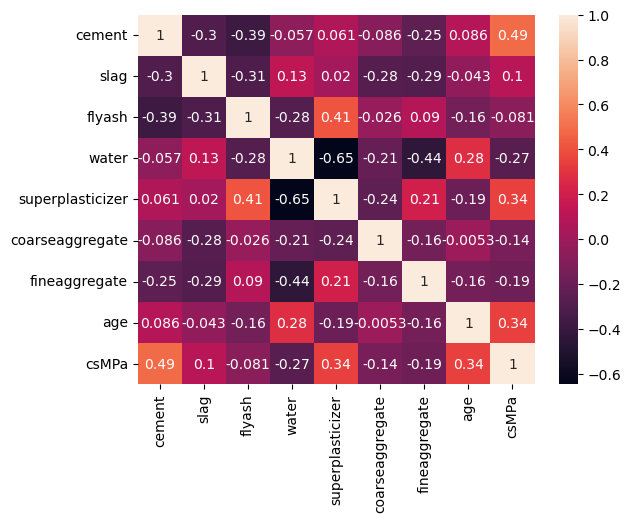

In [19]:
sns.heatmap(data_corr, annot=True)

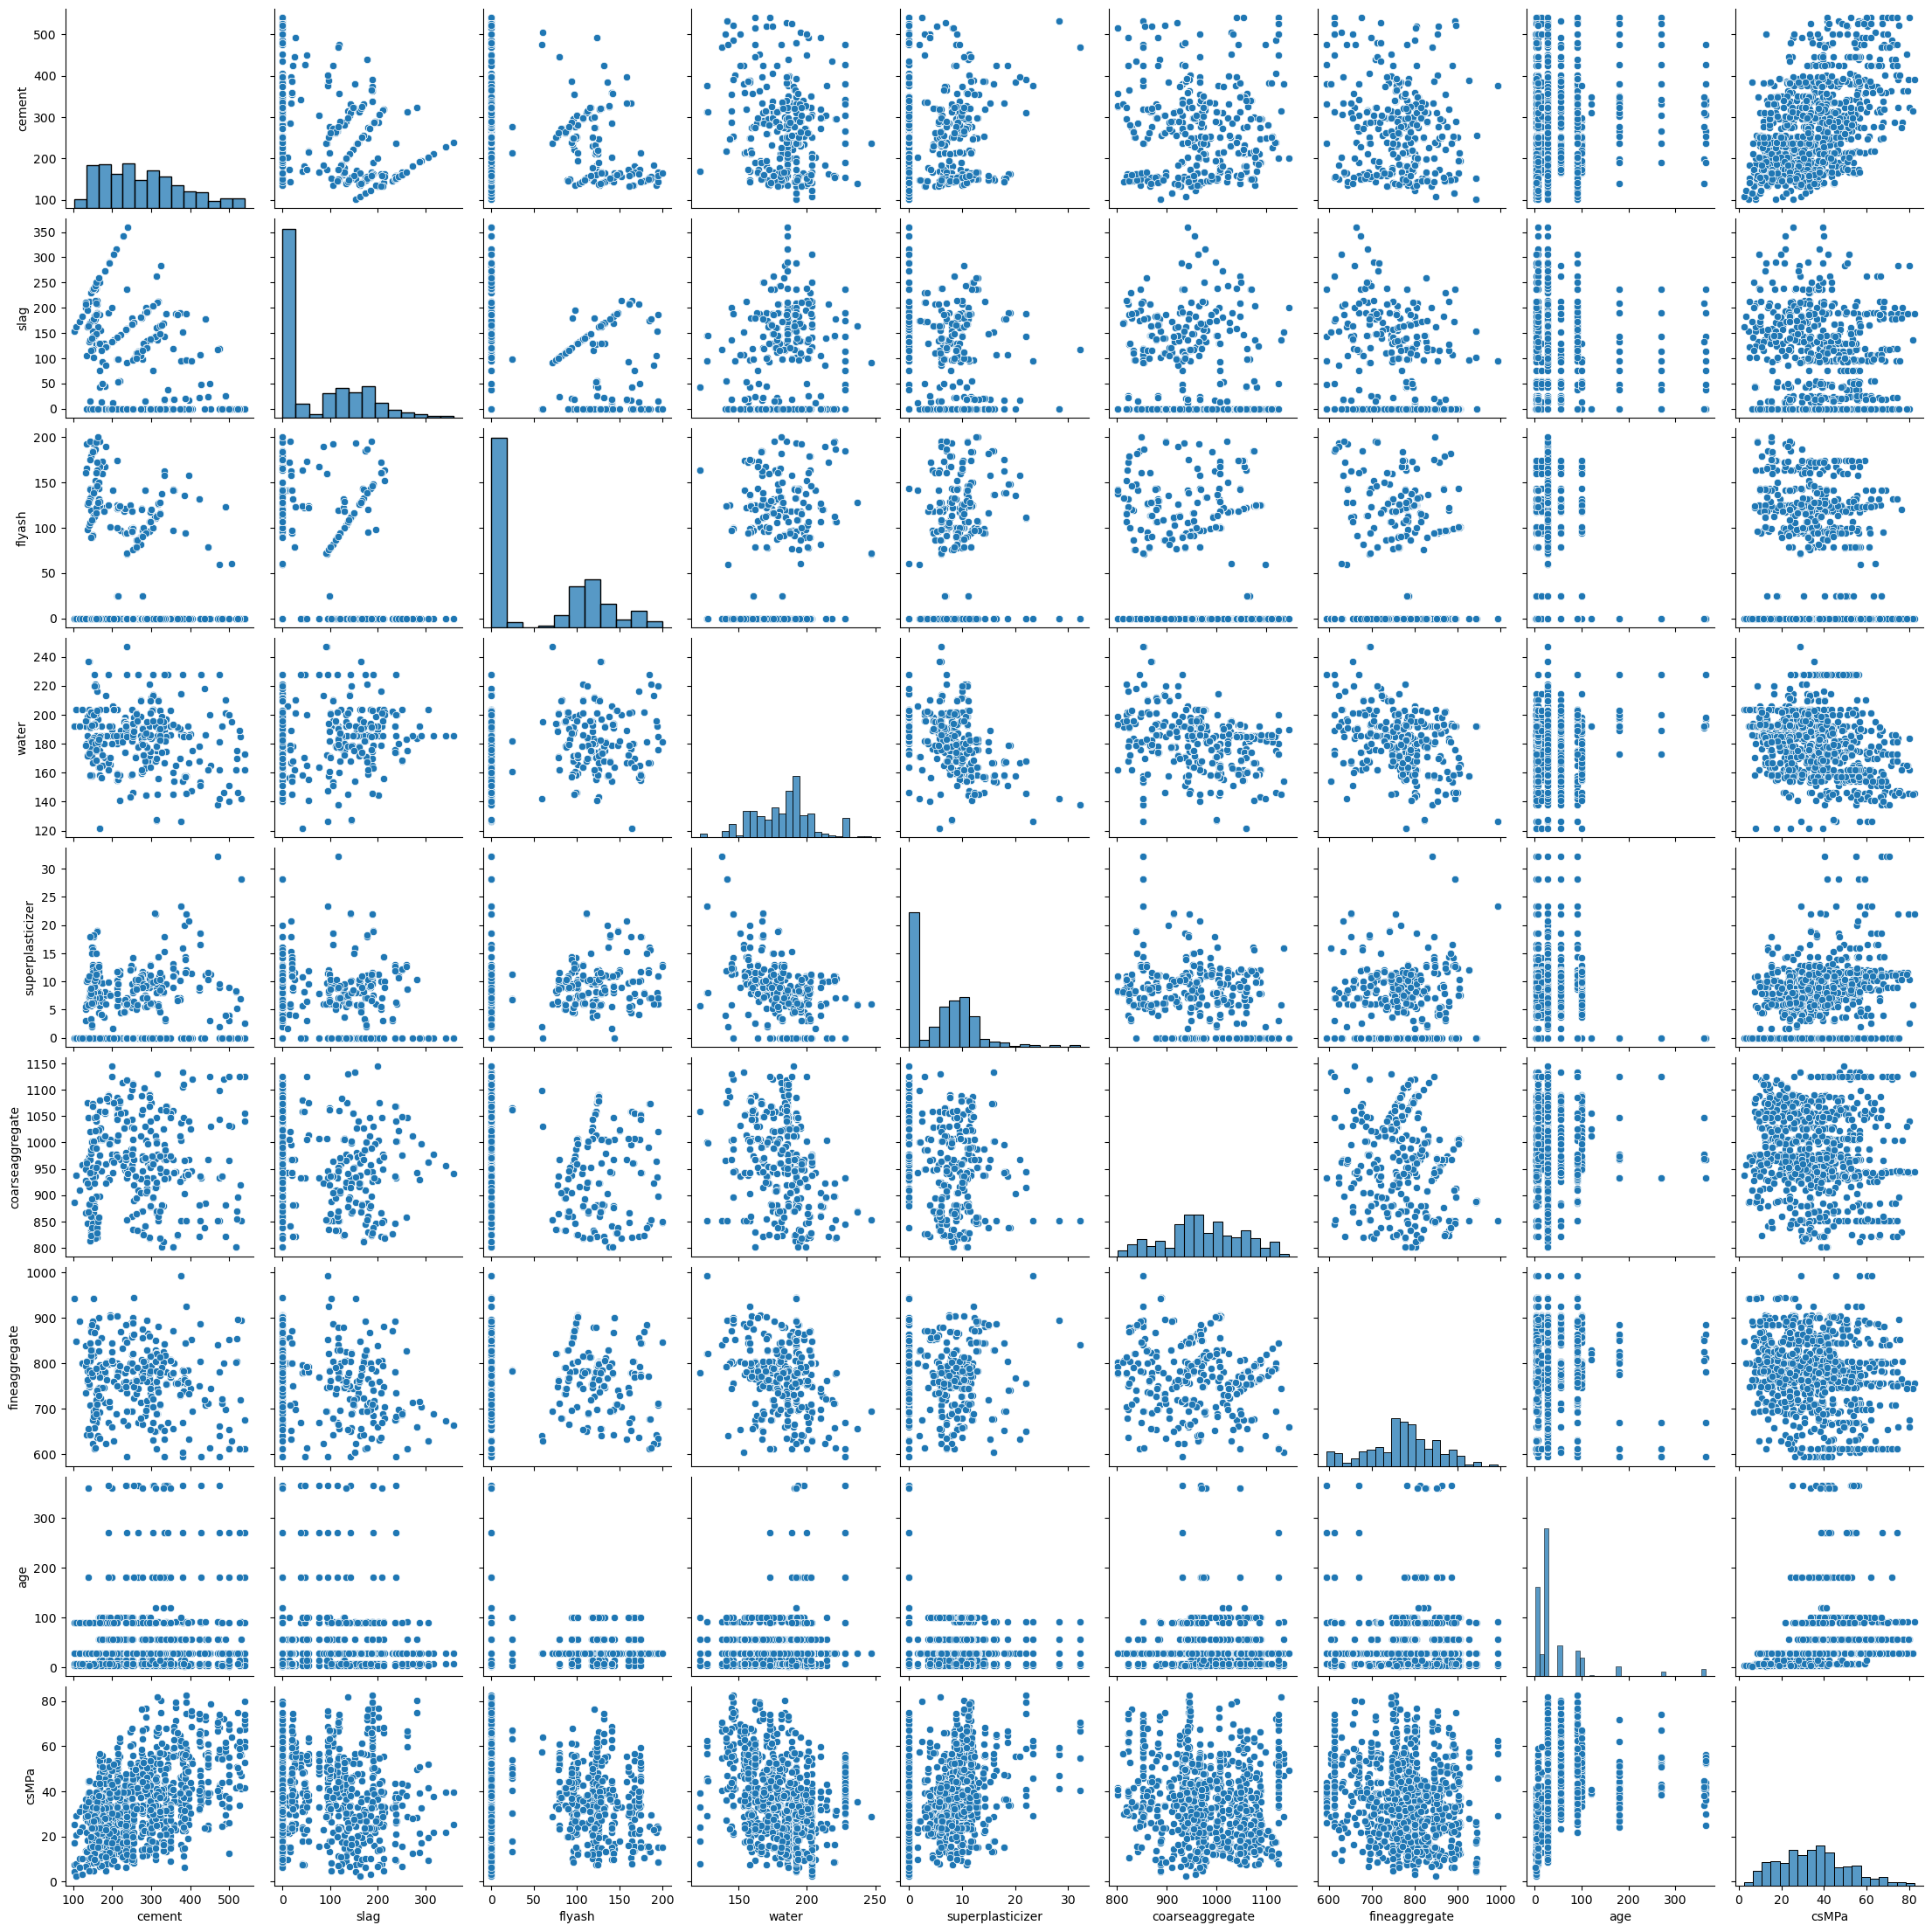

In [21]:
# pairplot
plt.figure(10,8)
sns.pairplot(clean_data)
plt.show()

### Observation in Correlation

In the correlation matrix, heatmap and the pairplot we can see the relationship and correlation of different features and the label in the dataset. 

1 represents a perfect positive correlation (increase in a result in an increase in b)

0 represents no correlation (increase in a result has no effect in b) and 

-1 represents a perfect negative correlation (increase in a result in a decrease in b)

We can see that values of cement, age and surplaticsizer have much stronger positive influence and correlation with the strength of the concreate. 
This is also evident in the pair plot for cement and the strength. As cement increases the strength increases.

however water (-0.269), coarseaggregrate and fineaggregrate compared to others have very stronger negative correlation with the strength of the concreate

water with (suplasticizer and fineaggregrate) have the worse correlation however water has a much stronger correlation with the age of the concrete.


In [27]:
# Extract the features
features = clean_data.drop(columns='csMPa')
features.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [28]:
# Extract the features
label = clean_data[['csMPa']]
label.head()



,csMPa
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


### Scaling the Features


In [30]:
# Scaling the data features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_data


array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
        0.07417582],
       [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
        0.07417582],
       [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
        0.73901099],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
        0.07417582],
       [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
        0.07417582],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
        0.07417582]])

In [41]:

# convert scaled data to dataframe
df = pd.DataFrame(scaled_data, columns=features.columns)
df['csMPA'] =label
df.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPA
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,79.99
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,61.89
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,40.27
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,41.05
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,44.30


### Spliting the dataset

In [43]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)
# Check the shape of the training and testing sets
print("Training set size:", train_data.shape)
print("Testing set size:", test_data.shape)
train_data.head()

Training set size: (904, 9)
Testing set size: (101, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPA
576,0.541096,0.000000,0.000000,0.600639,0.000000,0.485465,0.469142,0.035714,21.18
215,0.291553,0.000000,0.590705,0.586262,0.189441,0.660174,0.410437,0.005495,22.72
604,0.223744,0.000000,0.000000,0.464856,0.000000,0.941860,0.629704,0.074176,38.89
548,0.271233,0.409572,0.000000,0.510383,0.000000,0.738372,0.377070,0.016484,25.57
290,0.342009,0.000000,0.499250,0.194089,0.385093,0.595930,0.767185,0.005495,21.50


## Model Creating

In [49]:
train_x = train_data.drop(columns='csMPA')
train_y = train_data[['csMPA']]

test_x = test_data.drop(columns='csMPA')
test_y = test_data[['csMPA']]

# Convert the features and labels to 2D TensorFlow variables
train_X_tf = tf.convert_to_tensor(train_x, dtype=tf.float32)
train_y_tf = tf.convert_to_tensor(train_y, dtype=tf.float32)

test_X_tf = tf.convert_to_tensor(test_x, dtype=tf.float32)
test_y_tf = tf.convert_to_tensor(test_y, dtype=tf.float32)



In [55]:
# Weight and Bias tensor flow initialization
# Get the number of features (columns) in your training data
num_features = train_X_tf.shape[1]

# Initialize weights (w) with zeros - shape will be (num_features, 1) for regression
w = tf.Variable(tf.zeros([num_features, 1], dtype=tf.float32))

# Initialize bias (b) with zeros - single scalar value (or can be a vector of shape (1,))
b = tf.Variable(tf.zeros([1], dtype=tf.float32))

# Check the shapes
print("Weights shape:", w.shape)  # Should be (num_features, 1)
print("Bias shape:", b.shape)      # Should be (1,)


Weights shape: (8, 1)
Bias shape: (1,)


<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [56]:
import tensorflow as tf
# X is the feature, w is Weight and b is Biase
def regression(X, w, b):
    """
    Implements the linear regression function: z = Xw + b
    
    Args:
    X : tf.Tensor
        The input feature matrix of shape (batch_size, num_features).
    w : tf.Variable
        The weights matrix of shape (num_features, 1).
    b : tf.Variable
        The bias term (scalar or vector of shape (1,)).
    
    Returns:
    z : tf.Tensor
        The result of the linear equation: z = Xw + b
    """
    # Calculate z using the linear equation z = Xw + b
    z = tf.matmul(X, w) + b  # matmul is used for matrix multiplication
    
    return z
    


In [59]:
loss_function = lambda y, yhat: tf.reduce_mean(tf.square(y - yhat))

## Training The Model

In [65]:
# Define the model
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.w = tf.Variable(initial_value=0.0, trainable=True, dtype=tf.float32)
        self.b = tf.Variable(initial_value=0.0, trainable=True, dtype=tf.float32)

    def call(self, x):
        return self.w * x + self.b

# Initialize model
model = LinearRegressionModel()


# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Training function
def train(model, X_train, y_train, epochs):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            yhat = model(X_train)
            loss = loss_function(y_train, yhat)
        gradients = tape.gradient(loss, [model.w, model.b])
        optimizer.apply_gradients(zip(gradients, [model.w, model.b]))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.numpy()}')

# Train the model
train(model, train_X_tf, train_y_tf, epochs=1000)

# Print out the trained weights and bias
print(f'Trained weight: {model.w.numpy()}')
print(f'Trained bias: {model.b.numpy()}')

# Predict function
def predict(model, X):
    return model(X)

# Calculate RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Predict on training data
y_pred = predict(model, train_X_tf)

# Calculate and print RMSE
error = rmse(train_y_tf, y_pred)
print(f'RMSE of the model: {error.numpy()}')

Epoch 0, Loss: nan
Epoch 100, Loss: nan
Epoch 200, Loss: nan
Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan
Trained weight: nan
Trained bias: nan
RMSE of the model: nan
